In [1]:
# %pip install scikit-learn
# %pip install pandas

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [3]:
with open('merge.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [4]:
param_dist = {
    'hidden_layer_sizes': [(10,), (25,), (50,), (100,)], 
    'activation': ['logistic', 'tanh', 'relu'], 
    'solver': ['adam', 'sgd'], 
    'alpha': [0.0001, 0.001, 0.01, 0.1], 
    'learning_rate': ['constant', 'adaptive', 'invscaling'], 
}
modelo = MLPClassifier(random_state=42)
random_search = RandomizedSearchCV(modelo, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_treino, y_treino)


c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_iter=20,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(10,), (25,),
                                                               (50,), (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive',
                                                          'invscaling'],
                                        'solver': ['adam', 'sgd']},
                   random_state=42)

In [5]:
random_search.best_params_

{'solver': 'adam',
 'learning_rate': 'invscaling',
 'hidden_layer_sizes': (50,),
 'alpha': 0.01,
 'activation': 'relu'}

In [6]:
modelo = MLPClassifier(**random_search.best_params_, random_state=42)
modelo.fit(X_treino,y_treino)

c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=(50,), learning_rate='invscaling',
              random_state=42)

In [7]:
previsoes = modelo.predict(X_teste)
previsoes

array([2., 1., 1., ..., 2., 2., 1.])

In [8]:
modelo.score(X_teste,y_teste)

0.8587088915956151

0.8587088915956151

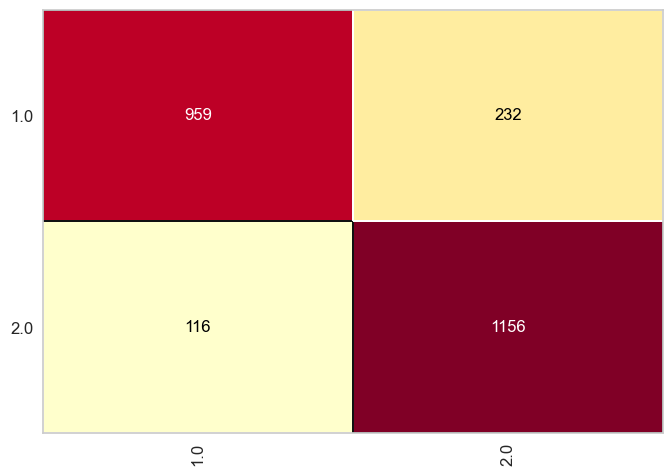

In [9]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [10]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kf.split(X_treino,y_treino):
    X_train, X_val = X_treino[train_index], X_treino[test_index]
    y_train, y_val = y_treino[train_index], y_treino[test_index]
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_teste)
    accuracy = accuracy_score(y_teste, y_pred)
    accuracies.append(accuracy)
    # Now you have train and validation sets for each fold
print("Accuracies for each fold:", accuracies, np.mean(accuracies), "+-", np.std(accuracies))

c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and 

Accuracies for each fold: [0.833130328867235, 0.8436865611043443, 0.8542427933414535, 0.85464880227365, 0.8432805521721478, 0.856272838002436, 0.8558668290702396, 0.8457166057653268, 0.8428745432399513, 0.8558668290702396] 0.8485586682907023 +- 0.007521582575337027


c:\Users\T-GAMER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
